In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn import preprocessing

In [497]:
file1 = r'C:\Users\Chandra Pratap\Downloads\auto_mpg_data(3).csv'


cars1 = pd.read_csv(file1)   # read in the first data file

# we have other columns named unamed which contains only NaN values
# so we drop them.
cars1.drop(cars1.columns[9:],axis=1,inplace=True) 

# concatenate the two data
cars = pd.concat([cars1])
cars  # print the first five rows of the data

,model_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
387,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
388,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
389,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
390,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [498]:
cars.info()  # print the info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_name    392 non-null    object 
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   model_year    392 non-null    int64  
 8   origin        392 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [499]:
# won't be needing the model name column so we drop it
cars = cars.drop('model_name',axis=1)
#cars = cars.drop('mpg',axis=1)

# check for duplicates and null values
print('sum of duplicated values: {}\n'.format(cars.duplicated().sum()))
print('sum of null values: {}'.format(cars.isnull().sum()))


sum of duplicated values: 0

sum of null values: mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [500]:
# let's print the summary statistics of the data
display(cars.describe())


# this line of code shows the count,mean,standard deviation,minimum and maximum values,25th,50th and 70th percentiles
# of each variable in the data.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


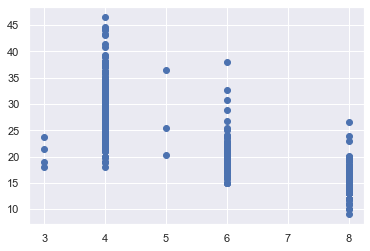

In [501]:
# let's visualize the distribution of the features of the cars
x = cars['cylinders']
y = cars['mpg']
plt.scatter(x,y)
plt.show()

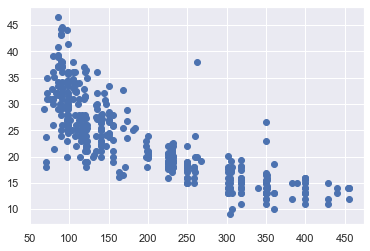

In [502]:
# let's visualize the distribution of the features of the cars
x = cars['displacement']
y = cars['mpg']
plt.scatter(x,y)
plt.show()

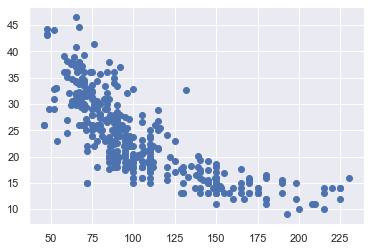

In [503]:
# let's visualize the distribution of the features of the cars
x = cars['horsepower']
y = cars['mpg']
plt.scatter(x,y)
plt.show()

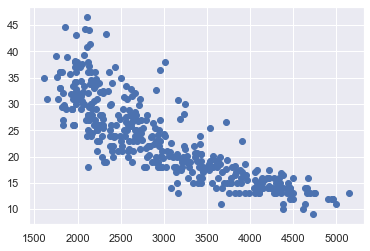

In [504]:
# let's visualize the distribution of the features of the cars
x = cars['weight']
y = cars['mpg']
plt.scatter(x,y)
plt.show()

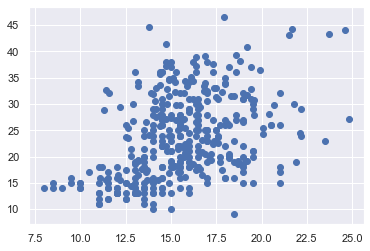

In [505]:
# let's visualize the distribution of the features of the cars
x = cars['acceleration']
y = cars['mpg']
plt.scatter(x,y)
plt.show()

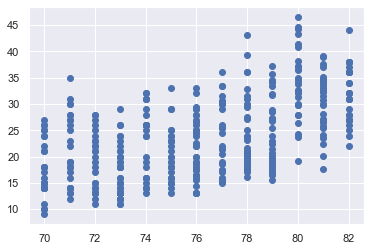

In [506]:
# let's visualize the distribution of the features of the cars
x = cars['model_year']
y = cars['mpg']
plt.scatter(x,y)
plt.show()

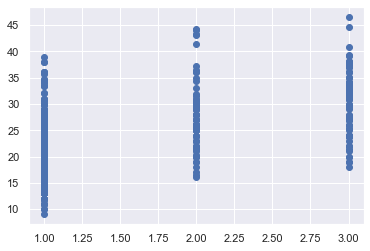

In [507]:
# let's visualize the distribution of the features of the cars
x = cars['origin']
y = cars['mpg']
plt.scatter(x,y)
plt.show()

# Cylinder Feature

In [508]:
X = cars.drop('cylinders',axis=1)  # create a DataFrame of independent variables
y = cars.cylinders   # create a series of the dependent variable

# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)





model = SGDRegressor(max_iter=500) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(max_iter=500)

In [509]:
ccylinders = model.predict(X_test)


# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,ccylinders)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,ccylinders)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,ccylinders)))

R2 Score: 0.8856269428104349

Mean Squared Error: 0.34569018326794365

Mean Absolute Error: 0.4691981060648664


# Displacement Feature

In [510]:
X = cars.drop('displacement',axis=1)  # create a DataFrame of independent variables
y = cars.displacement   # create a series of the dependent variable

# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(max_iter=500)

In [511]:
ddisplacement = model.predict(X_test)


# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,ddisplacement)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,ddisplacement)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,ddisplacement)))


R2 Score: 0.9588982010247775

Mean Squared Error: 476.19189090458536

Mean Absolute Error: 16.57847753966501


# HorsePower Feature

In [512]:
X = cars.drop('horsepower',axis=1)  # create a DataFrame of independent variables
y = cars.horsepower   # create a series of the dependent variable

# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(max_iter=500)

In [513]:
hhorsepower = model.predict(X_test)


# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,hhorsepower)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,hhorsepower)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,hhorsepower)))


R2 Score: 0.9183156724963168

Mean Squared Error: 128.46171649566136

Mean Absolute Error: 8.185576795482062


# Weight Feature

In [514]:
X = cars.drop('weight',axis=1)  # create a DataFrame of independent variables
y = cars.weight   # create a series of the dependent variable

# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(max_iter=500)

In [515]:
wweight = model.predict(X_test)


# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,wweight)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,wweight)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,wweight)))


R2 Score: 0.9338019230681488

Mean Squared Error: 48583.53319958089

Mean Absolute Error: 176.25108398235537


# Accleration Feature 

In [516]:
X = cars.drop('acceleration',axis=1)  # create a DataFrame of independent variables
y = cars.acceleration   # create a series of the dependent variable

# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(max_iter=500)

In [517]:
aacceleration = model.predict(X_test)


# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,aacceleration)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,aacceleration)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,aacceleration)))


R2 Score: 0.6144693399113164

Mean Squared Error: 2.804620922948623

Mean Absolute Error: 1.2285077724489895


# Model Year Feature

In [518]:
X = cars.drop('model_year',axis=1)  # create a DataFrame of independent variables
y = cars.model_year   # create a series of the dependent variable

# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(max_iter=500)

In [519]:
year = model.predict(X_test)

# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,year)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,year)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,year)))


R2 Score: 0.5038955053909999

Mean Squared Error: 6.803835851409744

Mean Absolute Error: 2.151389844224641


# Origin Feature

In [520]:
X = cars.drop('origin',axis=1)  # create a DataFrame of independent variables
y = cars.origin   # create a series of the dependent variable

# the independent variables are not of the same scale so we scale them
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(max_iter=500)

In [521]:
oorigin = model.predict(X_test)
# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,oorigin)))

# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,oorigin)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,oorigin)))


R2 Score: 0.4446739391185093

Mean Squared Error: 0.35898375998235416

Mean Absolute Error: 0.45435189137232124


# All The Features

In [522]:
X = cars.drop(['mpg'],axis=1)
y = cars['mpg']
# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(y)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data




SGDRegressor(max_iter=500)

In [523]:
Y_predict = model.predict(X_test)
# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,Y_predict)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,Y_predict)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,Y_predict)))

R2 Score: 0.7983975592004012

Mean Squared Error: 0.20410018827664475

Mean Absolute Error: 0.33020189018049434


# All Features Iter = 500, penalty = l1

In [524]:
X = cars.drop(['mpg'],axis=1)
y = cars['mpg']
# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(y)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500,penalty='l1') # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(max_iter=500, penalty='l1')

In [525]:
Y_predict = model.predict(X_test)

# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,Y_predict)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,Y_predict)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,Y_predict)))

R2 Score: 0.7962610729978208

Mean Squared Error: 0.20626314441183652

Mean Absolute Error: 0.3287734612665438


# All Features Iter = 500, eta0 = 10

In [526]:
X = cars.drop(['mpg'],axis=1)
y = cars['mpg']
# the independent variables are not of the same scale so we scale them 
# scaling the feature variables ensures fast computing.
X_scaled = preprocessing.scale(X)
Y_scaled = preprocessing.scale(y)

# preprocessing.scale() returns a 2-d array not a DataFrame so we make our scaled variables
# a DataFrame.
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

# split our data into training and testing data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size=.3,random_state=0)


model = SGDRegressor(max_iter=500,penalty='l1',eta0=10) # initialize the SGDRegressor model
model.fit(X_train,y_train)  # we fit the model with the training data

SGDRegressor(eta0=10, max_iter=500, penalty='l1')

In [527]:
Y_predict = model.predict(X_test)

# calculate the R2 of the model
print('R2 Score: {}\n'.format(r2_score(y_test,Y_predict)))
# compute the mean squared error of the model
print('Mean Squared Error: {}\n'.format(mean_squared_error(y_test,Y_predict)))
#Computing the mean absolute error
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_test,Y_predict)))

R2 Score: -1.3373959075933106e+25

Mean Squared Error: 1.3539655346313252e+25

Mean Absolute Error: 2971372476859.6597
